#1 SKLearn-西瓜3.0a的KNN算法

All: [ 52.94117647  47.05882353]
Training: [ 57.14285714  42.85714286]
Test: [ 50.  50.]
Fraction Correct [Accuracy]:
0.8
Samples correctly classified:
[1 2 3 4 5 6 7 8]
Samples incorrectly classified:
[0 9]


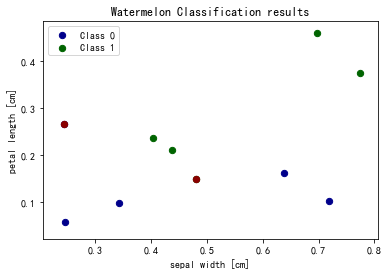

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

dataLoad = pd.read_csv('data/watermelon30a.txt', header=None)
x,y = dataLoad.values[:, :-1], dataLoad[2].tolist()
y = pd.Categorical(y).codes
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.45, random_state=123,
                                                    stratify=y)
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

classifier = KNeighborsClassifier()
classifier.fit(train_x, train_y)
pred_y = classifier.predict(test_x)

print("Fraction Correct [Accuracy]:")
accuracy = np.sum(pred_y == test_y) / float(len(test_y))
print(accuracy)

print("Samples correctly classified:")
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print("Samples incorrectly classified:")
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)
colors = ["darkblue","darkgreen"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_x[idx, 0],test_x[idx, 1],c=color, s =40, label="Class %s" % n)

plt.scatter(test_x[incorrect_idx, 0],test_x[incorrect_idx,1],c='darkred', s =40)
plt.xlabel("sepal width [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.title("Watermelon Classification results")
plt.show()

#2 SKLearn-鸢尾花的KNN算法

{'n_neighbors': 5, 'weights': 'uniform', 'metric': 'manhattan'}


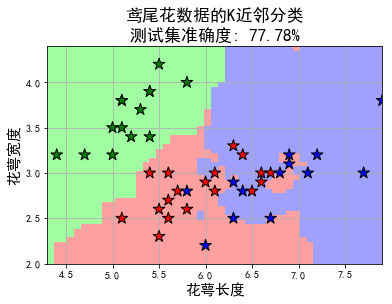

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation, grid_search
import matplotlib as mpl

# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

data = pd.read_csv('data/iris.data', header=None)
x = data[np.arange(4)]
y = pd.Categorical(data[4]).codes
x = x.iloc[:, :2]# 为了可视化，仅使用前两列特征
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)

nFolds = 4
random_state = 1234
metrics = ['minkowski','euclidean','manhattan']
weights = ['uniform','distance'] #10.0**np.arange(-5,4)
algorithm=['ball_tree','kd_tree','brute', 'auto']
numNeighbors = np.arange(5,10)
param_grid = dict(metric=metrics,weights=weights,n_neighbors=numNeighbors)
cv = cross_validation.StratifiedKFold(y_train,nFolds)
classifier = grid_search.GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=cv)

classifier.fit(x_train, y_train)
y_test_hat = classifier.predict(x_test)
print(classifier.best_params_)
N, M = 50,50 # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

y_show_hat = classifier.predict(x_show)  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)

plt.title(u'鸢尾花数据的K近邻分类\n测试集准确度: %.2f%%' % (100 * classifier.score(x_test, y_test)), fontsize=17)
plt.show()

#3 Tensorflow-mnist

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np

mnist = input_data.read_data_sets("mnist_data/", one_hot=True)

Xtrain, Ytrain = mnist.train.next_batch(5000)
Xtest, Ytest = mnist.test.next_batch(200)
print('Xtrain.shape:', Xtrain.shape, ', Xtest.shape:', Xtest.shape)
print('Ytrain.shape:', Ytrain.shape, ', Ytest.shape:', Ytest.shape)

xtrain = tf.placeholder("float", [None, 784])
xtest = tf.placeholder("float", [784])

distance = tf.reduce_sum(tf.abs(tf.add(xtrain, tf.negative(xtest))), axis=1)
pred = tf.arg_min(distance, 0)

accuracy = 0

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    Ntest = len(Xtest)
    for i in range(Ntest):
        nn_index = sess.run(pred, feed_dict={xtrain:Xtrain, xtest:Xtest[i, :]})
        pred_class_label = np.argmax(Ytrain[nn_index])
        true_class_label = np.argmax(Ytest[i])
        
        if pred_class_label == true_class_label:
            accuracy += 1
    print("Done!")
    accuracy /= Ntest
    print("Accuracy: %.2f%%" % (100 * accuracy))

Extracting mnist_data/train-images-idx3-ubyte.gz


Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


Xtrain.shape: (5000, 784) , Xtest.shape: (200, 784)
Ytrain.shape: (5000, 10) , Ytest.shape: (200, 10)


Done!
Accuracy: 92.00%
